### CARGA DE LIBRERIAS

In [6]:
import pandas as pd
import numpy as np

from ast import literal_eval

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import shutil
import os

**En primer lugar, procedemos a explicar información relevante de los datos**

**PadChest**: es un gran conjunto de datos de imágenes de rayos X de tórax con informes anotados de etiquetas múltiples
- Incluye 160861 imágenes de 67.000 pacientes interpretadas e informadas por radiólogos en el Hospital San Juan (España) desde 2009 hasta 2017. 
- Un 27% de los informes fueron anotados manualmente por médicos entrenados y el conjunto restante fue etiquetado utilizando un método supervisado basado en una red neuronal recurrente con mecanismos de atención
- Sin embargo, para la realización de este proyecto vamos a usar solo aquellas imágenes etiquetadas manualemnte
- Para cada caso, se cubren 6 vistas de posición diferentes e información adicional sobre la adquisición de la imagen y la demografía del paciente.

In [66]:
from PIL import Image
import os

def resize_images_in_folder(folder_path, size=(512, 512)):
    for filename in os.listdir(folder_path):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            image_path = os.path.join(folder_path, filename)
            with Image.open(image_path) as img:
                img_resized = img.resize(size)
                img_resized.save(image_path)
            print(f'Resized {filename}')

In [ ]:
folder_path = 'DATA/54/'  
resize_images_in_folder(folder_path)

In [ ]:
folder_path = 'DATA/4/'  
resize_images_in_folder(folder_path)

In [ ]:
folder_path = 'DATA/10/'  
resize_images_in_folder(folder_path)

In [ ]:
folder_path = 'DATA/2/'  
resize_images_in_folder(folder_path)

### CARGA DE DATOS

Cargamos el fichero de metadatos asociados a las imágenes

In [8]:
datos_csv = pd.read_csv("./DATA/PADCHEST_chest_x_ray_images_labels_160K_01.02.19.csv")


In [72]:
datos_csv.head()

,Unnamed: 0,ImageID,ImageDir,StudyDate_DICOM,StudyID,PatientID,PatientBirth,PatientSex_DICOM,ViewPosition_DICOM,Projection,...,ExposureTime,RelativeXRayExposure_DICOM,ReportID,Report,MethodLabel,Labels,Localizations,LabelsLocalizationsBySentence,labelCUIS,LocalizationsCUIS
0,0,20536686640136348236148679891455886468_k6ga29.png,0,20140915,20536686640136348236148679891455886468,839860488694292331637988235681460987,1930.0,F,POSTEROANTERIOR,PA,...,10.0,-1.42,4765777,sin hallazg patolog edad pacient .,Physician,['normal'],[],"[['normal'], ['normal']]",[],[]
1,1,135803415504923515076821959678074435083_fzis7d...,0,20150914,135803415504923515076821959678074435083,313572750430997347502932654319389875966,1929.0,M,LATERAL,L,...,25.0,NaN,4991845,cambi pulmonar cronic sever . sign fibrosis b...,Physician,"['pulmonary fibrosis', 'chronic changes', 'kyp...","['loc basal', 'loc basal bilateral']","[['pulmonary fibrosis', 'loc basal bilateral']...",['C0034069' 'C0742362' 'C2115817' 'C3544344'],['C1282378']
2,2,135803415504923515076821959678074435083_fzis7b...,0,20150914,135803415504923515076821959678074435083,313572750430997347502932654319389875966,1929.0,M,POSTEROANTERIOR,PA,...,10.0,NaN,4991845,cambi pulmonar cronic sever . sign fibrosis b...,Physician,"['pulmonary fibrosis', 'chronic changes', 'kyp...","['loc basal', 'loc basal bilateral']","[['pulmonary fibrosis', 'loc basal bilateral']...",['C0034069' 'C0742362' 'C2115817' 'C3544344'],['C1282378']
3,3,113855343774216031107737439268243531979_3k951l...,0,20150717,113855343774216031107737439268243531979,50783093527901818115346441867348318648,1925.0,F,POSTEROANTERIOR,PA,...,8.0,NaN,4955977,. . siluet cardi mediastin dentr normal . cam...,Physician,['chronic changes'],"['loc cardiac', 'loc mediastinum', 'loc costop...","[['chronic changes'], ['chronic changes'], ['n...",['C0742362'],['C1522601' 'C0025066' 'C0230151']
4,4,113855343774216031107737439268243531979_3k951n...,0,20150717,113855343774216031107737439268243531979,50783093527901818115346441867348318648,1925.0,F,LATERAL,L,...,20.0,NaN,4955977,. . siluet cardi mediastin dentr normal . cam...,Physician,['chronic changes'],"['loc cardiac', 'loc mediastinum', 'loc costop...","[['chronic changes'], ['chronic changes'], ['n...",['C0742362'],['C1522601' 'C0025066' 'C0230151']


In [73]:
datos_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160861 entries, 0 to 160860
Data columns (total 36 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       160861 non-null  int64  
 1   ImageID                          160861 non-null  object 
 2   ImageDir                         160861 non-null  int64  
 3   StudyDate_DICOM                  160861 non-null  int64  
 4   StudyID                          160861 non-null  object 
 5   PatientID                        160861 non-null  object 
 6   PatientBirth                     160855 non-null  float64
 7   PatientSex_DICOM                 160857 non-null  object 
 8   ViewPosition_DICOM               91776 non-null   object 
 9   Projection                       160861 non-null  object 
 10  MethodProjection                 160861 non-null  object 
 11  Pediatric                        160861 non-null  object 
 12  Mo

In [74]:
datos_csv.iloc[:,:16]

,Unnamed: 0,ImageID,ImageDir,StudyDate_DICOM,StudyID,PatientID,PatientBirth,PatientSex_DICOM,ViewPosition_DICOM,Projection,MethodProjection,Pediatric,Modality_DICOM,Manufacturer_DICOM,PhotometricInterpretation_DICOM,PixelRepresentation_DICOM
0,0,20536686640136348236148679891455886468_k6ga29.png,0,20140915,20536686640136348236148679891455886468,839860488694292331637988235681460987,1930.0,F,POSTEROANTERIOR,PA,Manual review of DICOM fields,No,CR,ImagingDynamicsCompanyLtd,MONOCHROME2,0
1,1,135803415504923515076821959678074435083_fzis7d...,0,20150914,135803415504923515076821959678074435083,313572750430997347502932654319389875966,1929.0,M,LATERAL,L,Manual review of DICOM fields,No,CR,ImagingDynamicsCompanyLtd,MONOCHROME2,0
2,2,135803415504923515076821959678074435083_fzis7b...,0,20150914,135803415504923515076821959678074435083,313572750430997347502932654319389875966,1929.0,M,POSTEROANTERIOR,PA,Manual review of DICOM fields,No,CR,ImagingDynamicsCompanyLtd,MONOCHROME2,0
3,3,113855343774216031107737439268243531979_3k951l...,0,20150717,113855343774216031107737439268243531979,50783093527901818115346441867348318648,1925.0,F,POSTEROANTERIOR,PA,Manual review of DICOM fields,No,CR,ImagingDynamicsCompanyLtd,MONOCHROME2,0
4,4,113855343774216031107737439268243531979_3k951n...,0,20150717,113855343774216031107737439268243531979,50783093527901818115346441867348318648,1925.0,F,LATERAL,L,Manual review of DICOM fields,No,CR,ImagingDynamicsCompanyLtd,MONOCHROME2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160856,160856,1284011361929414522814654121696751542351444145...,49,20110321,1284011361929414522814654121696751542351444145...,112930952416074060371371014599496493673,1948.0,M,POSTEROANTERIOR,PA,Manual review of DICOM fields,No,CR,ImagingDynamicsCompanyLtd,MONOCHROME2,0
160857,160857,1284011361929414522094646571696751542351444145...,49,20090609,1284011361929414522094646571696751542351444145...,282743729971423358706056731890510600934,1944.0,F,POSTEROANTERIOR,PA,Manual review of DICOM fields,No,CR,ImagingDynamicsCompanyLtd,MONOCHROME2,0
160858,160858,1284011361929414522086390631696751542351444145...,49,20110415,1284011361929414522086390631696751542351444145...,52648743308541843883453242716226652771,1965.0,M,NaN,AP_horizontal,Manual review of DICOM fields,No,CR,PhilipsMedicalSystems,MONOCHROME2,0
160859,160859,1284011361929414522084108901696751542351444145...,49,20101214,1284011361929414522084108901696751542351444145...,228646130593152933811948996634154201216,1943.0,F,POSTEROANTERIOR,PA,Manual review of DICOM fields,No,CR,ImagingDynamicsCompanyLtd,MONOCHROME2,0


In [75]:
datos_csv.iloc[:,16:]

,PixelAspectRatio_DICOM,SpatialResolution_DICOM,BitsStored_DICOM,WindowCenter_DICOM,WindowWidth_DICOM,Rows_DICOM,Columns_DICOM,XRayTubeCurrent_DICOM,Exposure_DICOM,ExposureInuAs_DICOM,ExposureTime,RelativeXRayExposure_DICOM,ReportID,Report,MethodLabel,Labels,Localizations,LabelsLocalizationsBySentence,labelCUIS,LocalizationsCUIS
0,NaN,NaN,12,2092.0,2251.0,1728,1872,250.0,2.0,2500.0,10.0,-1.42,4765777,sin hallazg patolog edad pacient .,Physician,['normal'],[],"[['normal'], ['normal']]",[],[]
1,NaN,NaN,12,2631.0,2065.0,3296,3236,400.0,10.0,10000.0,25.0,NaN,4991845,cambi pulmonar cronic sever . sign fibrosis b...,Physician,"['pulmonary fibrosis', 'chronic changes', 'kyp...","['loc basal', 'loc basal bilateral']","[['pulmonary fibrosis', 'loc basal bilateral']...",['C0034069' 'C0742362' 'C2115817' 'C3544344'],['C1282378']
2,NaN,NaN,12,2155.0,2880.0,3572,3732,320.0,3.0,3200.0,10.0,NaN,4991845,cambi pulmonar cronic sever . sign fibrosis b...,Physician,"['pulmonary fibrosis', 'chronic changes', 'kyp...","['loc basal', 'loc basal bilateral']","[['pulmonary fibrosis', 'loc basal bilateral']...",['C0034069' 'C0742362' 'C2115817' 'C3544344'],['C1282378']
3,NaN,NaN,12,2472.0,2325.0,3584,3240,400.0,3.0,3200.0,8.0,NaN,4955977,. . siluet cardi mediastin dentr normal . cam...,Physician,['chronic changes'],"['loc cardiac', 'loc mediastinum', 'loc costop...","[['chronic changes'], ['chronic changes'], ['n...",['C0742362'],['C1522601' 'C0025066' 'C0230151']
4,NaN,NaN,12,2853.0,1871.0,3732,2908,320.0,6.0,6400.0,20.0,NaN,4955977,. . siluet cardi mediastin dentr normal . cam...,Physician,['chronic changes'],"['loc cardiac', 'loc mediastinum', 'loc costop...","[['chronic changes'], ['chronic changes'], ['n...",['C0742362'],['C1522601' 'C0025066' 'C0230151']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160856,NaN,NaN,12,2061.0,2258.0,1744,1804,250.0,2.0,2500.0,10.0,-0.69,4018689,import sign radiolog epoc . pinzamient ambos ...,RNN_model,"['COPD signs', 'costophrenic angle blunting']",['loc costophrenic angle'],"['COPD signs', 'costophrenic angle blunting', ...",['C0024117' 'C0742855'],['C0230151']
160857,NaN,NaN,12,2090.0,2325.0,1700,1784,250.0,2.0,2500.0,10.0,-0.85,3639865,dentr normal .,RNN_model,['normal'],[],['normal'],[],[]
160858,"['1', '1']",0.2,12,2047.0,4095.0,1760,2140,NaN,NaN,NaN,NaN,784.00,4035503,tub endotraqueal sond nasogastr situacion cor...,RNN_model,"['NSG tube', ' endotracheal tube']",['loc tracheal'],"['NSG tube', ' endotracheal tube', 'loc trache...",['C0336630'],['C0040578']
160859,NaN,NaN,12,1865.0,2087.0,1560,1692,320.0,3.0,3200.0,10.0,-1.00,3958189,dentr normal .,RNN_model,['normal'],[],['normal'],[],[]


#### DESCRIPCIÓN DE LAS COLUMNAS

Como hemos dicho, vamos a usar solo los datos etiquetados manualmente, para ello los inpseccionamos

In [76]:
datos_filtrados = datos_csv[datos_csv['MethodLabel'] == 'Physician']

In [77]:
datos_filtrados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39053 entries, 0 to 39052
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       39053 non-null  int64  
 1   ImageID                          39053 non-null  object 
 2   ImageDir                         39053 non-null  int64  
 3   StudyDate_DICOM                  39053 non-null  int64  
 4   StudyID                          39053 non-null  object 
 5   PatientID                        39053 non-null  object 
 6   PatientBirth                     39053 non-null  float64
 7   PatientSex_DICOM                 39053 non-null  object 
 8   ViewPosition_DICOM               21318 non-null  object 
 9   Projection                       39053 non-null  object 
 10  MethodProjection                 39053 non-null  object 
 11  Pediatric                        39053 non-null  object 
 12  Modality_DICOM         

Como podemos ver, **pasamos de tener 160861 datos de imágenes a tener 39053**

Observamos que en las primeras 39053 posiciones están los datos etiquetados manualmente

In [78]:
#posicion de la columna MethodLabel
datos_csv.columns.get_loc("MethodLabel")

30

In [79]:
datos_csv.iloc[:39053, 30].value_counts()

MethodLabel
Physician    39053
Name: count, dtype: int64

El subconjunto de datos etiquetados manualmente está repartido en las diferentes subcarpetas

In [80]:
datos_csv.iloc[:39053, 2].value_counts()

ImageDir
54    4297
1     3024
11    3022
0     3004
4     2993
3     2992
8     2991
9     2990
2     2984
10    2975
5     2947
7     2742
6     1645
12     447
Name: count, dtype: int64

#### Obtenemos las 5 clases más frecuentes. En la columna labels se encuentran tanto los hallazgos radiográficos como las enfermedades (diagnósticos), debemos separar para quedarnos solo con los diagnósticos.

In [81]:
#posicion de la columna Labels
datos_csv.columns.get_loc("Labels")

31

Generamos un dataset auxilir con la columna "Labels"

In [82]:
labels = pd.DataFrame(datos_csv.iloc[:39053, 31])

In [83]:
labels

,Labels
0,['normal']
1,"['pulmonary fibrosis', 'chronic changes', 'kyp..."
2,"['pulmonary fibrosis', 'chronic changes', 'kyp..."
3,['chronic changes']
4,['chronic changes']
...,...
39048,['vertebral degenerative changes']
39049,['vertebral degenerative changes']
39050,"['supra aortic elongation', 'chronic changes',..."
39051,"['supra aortic elongation', 'chronic changes',..."


In [84]:
diagnosticos = [
    "normal",
    "pneumonia",
    "atypical pneumonia",
    "tuberculosis",
    "tuberculosis sequelae",
    "lung metastasis",
    "lymphangitis carcinomatosa",
    "lepidic adenocarcinoma",
    "pulmonary fibrosis",
    "post radiotherapy changes",
    "asbestosis signs",
    "emphysema",
    "COPD signs",
    "heart insufficiency",
    "respiratory distress",
    "pulmonary hypertension",
    "pulmonary artery hypertension",
    "pulmonary venous hypertension",
    "pulmonary edema", 
    "bone metastasis"
]


In [85]:
# Filtrar los elementos de cada fila que aparecen en la lista diagnosticos_raiz
labels["filtered_labels"] = labels["Labels"].apply(lambda x: [item for item in literal_eval(x) if item in diagnosticos])


Eliminamos las filas que no tengan ninguna enfermedad

In [86]:
filtered_labels = labels[(labels["filtered_labels"].apply(len) > 0) & 
                        (labels["filtered_labels"].apply(len) < 2)]
filtered_labels

,Labels,filtered_labels
0,['normal'],[normal]
1,"['pulmonary fibrosis', 'chronic changes', 'kyp...",[pulmonary fibrosis]
2,"['pulmonary fibrosis', 'chronic changes', 'kyp...",[pulmonary fibrosis]
11,"['heart insufficiency', 'pleural effusion', 's...",[heart insufficiency]
14,['normal'],[normal]
...,...,...
39033,['normal'],[normal]
39037,['normal'],[normal]
39038,['normal'],[normal]
39039,['normal'],[normal]


Generamos una lista auxiliar con todas las categorías para realizar un conteo de frecuencias de cada una de ellas

In [87]:
lista_etiquetas = []
for i in range(len(filtered_labels)):
    #literal_eval sirve para obtener una lista contenida en un str
    fila = filtered_labels.iloc[i,1]
    for j in range(len(fila)):
        lista_etiquetas.append(fila[j])
    

In [88]:
lista_etiquetas

['normal',
 'pulmonary fibrosis',
 'pulmonary fibrosis',
 'heart insufficiency',
 'normal',
 'normal',
 'COPD signs',
 'COPD signs',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'COPD signs',
 'normal',
 'normal',
 'normal',
 'pneumonia',
 'normal',
 'normal',
 'pneumonia',
 'COPD signs',
 'COPD signs',
 'normal',
 'normal',
 'tuberculosis sequelae',
 'normal',
 'normal',
 'normal',
 'COPD signs',
 'normal',
 'normal',
 'normal',
 'normal',
 'heart insufficiency',
 'normal',
 'normal',
 'COPD signs',
 'COPD signs',
 'normal',
 'COPD signs',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'heart insufficiency',
 'pneumonia',
 'pneumonia',
 'COPD signs',
 'COPD signs',
 'normal',
 'normal',
 'normal',
 'COPD signs',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'COPD signs',
 'COPD signs',
 'pneumonia',
 'pneumonia',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'pneumonia',
 'normal',
 'normal',
 'normal',
 'normal'

Usamos la función Counter para ver la frecuencia de aparición de cada clase

In [89]:
from collections import Counter
cont = Counter(lista_etiquetas)

In [90]:
cont

Counter({'normal': 12694,
         'pulmonary fibrosis': 128,
         'heart insufficiency': 433,
         'COPD signs': 4444,
         'pneumonia': 1469,
         'tuberculosis sequelae': 121,
         'pulmonary artery hypertension': 7,
         'tuberculosis': 36,
         'atypical pneumonia': 41,
         'bone metastasis': 28,
         'pulmonary edema': 67,
         'asbestosis signs': 9,
         'pulmonary hypertension': 27,
         'emphysema': 238,
         'lung metastasis': 65,
         'post radiotherapy changes': 27,
         'lymphangitis carcinomatosa': 8,
         'lepidic adenocarcinoma': 6,
         'respiratory distress': 1,
         'pulmonary venous hypertension': 4})

Ordenamos las clases por frecuencia de aparición

In [91]:
# Ordenar los elementos por frecuencia
elementos_ordenados_por_frecuencia = sorted(cont.items(), key=lambda x: x[1], reverse=True)

print("Elementos ordenados por frecuencia:")
for elemento, frecuencia in elementos_ordenados_por_frecuencia:
    if elemento in diagnosticos:
        print(f"Enfermedad: {elemento}, Frecuencia: {frecuencia}")


Elementos ordenados por frecuencia:
Enfermedad: normal, Frecuencia: 12694
Enfermedad: COPD signs, Frecuencia: 4444
Enfermedad: pneumonia, Frecuencia: 1469
Enfermedad: heart insufficiency, Frecuencia: 433
Enfermedad: emphysema, Frecuencia: 238
Enfermedad: pulmonary fibrosis, Frecuencia: 128
Enfermedad: tuberculosis sequelae, Frecuencia: 121
Enfermedad: pulmonary edema, Frecuencia: 67
Enfermedad: lung metastasis, Frecuencia: 65
Enfermedad: atypical pneumonia, Frecuencia: 41
Enfermedad: tuberculosis, Frecuencia: 36
Enfermedad: bone metastasis, Frecuencia: 28
Enfermedad: pulmonary hypertension, Frecuencia: 27
Enfermedad: post radiotherapy changes, Frecuencia: 27
Enfermedad: asbestosis signs, Frecuencia: 9
Enfermedad: lymphangitis carcinomatosa, Frecuencia: 8
Enfermedad: pulmonary artery hypertension, Frecuencia: 7
Enfermedad: lepidic adenocarcinoma, Frecuencia: 6
Enfermedad: pulmonary venous hypertension, Frecuencia: 4
Enfermedad: respiratory distress, Frecuencia: 1


Vemos cuales son las clases más frecuentes

In [92]:
elementos_filtrados = [(elemento, frecuencia) for elemento, frecuencia in elementos_ordenados_por_frecuencia if frecuencia > 400]
elementos_filtrados

[('normal', 12694),
 ('COPD signs', 4444),
 ('pneumonia', 1469),
 ('heart insufficiency', 433)]

Las representamos gráficamente

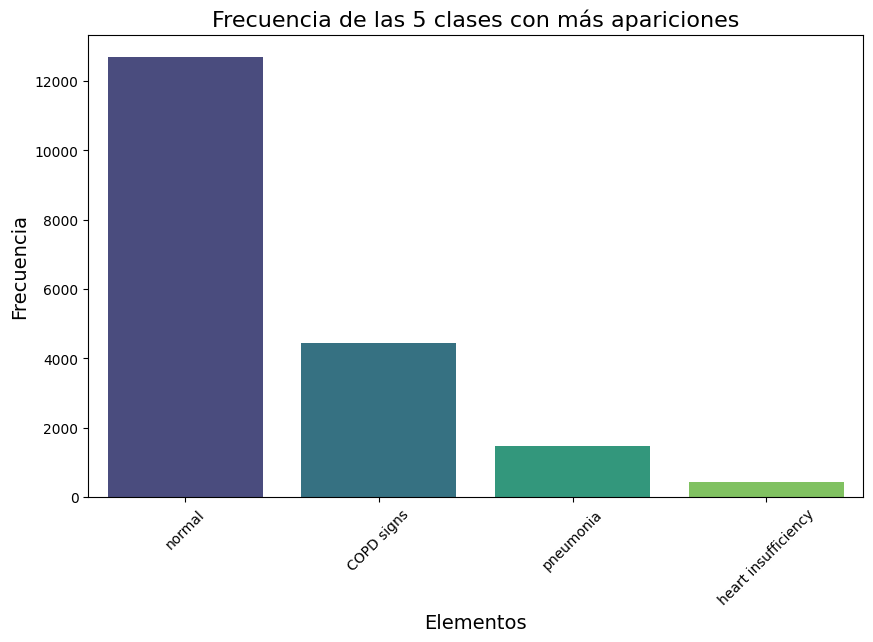

In [93]:
etiquetas = [str(elemento) for elemento, frecuencia in elementos_filtrados]
valores = [frecuencia for elemento, frecuencia in elementos_filtrados]

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=etiquetas, y=valores, palette="viridis")

# Añadir etiquetas al gráfico
plt.xlabel('Elementos', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.title('Frecuencia de las 5 clases con más apariciones', fontsize=16)

# Ajustar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


Nos quedamos con las posiciones, que tienen al menos 1 de las 5 enfermedades más comunes, para el conjunto de datos **etiquetado**

In [94]:
datos_filtrados = datos_filtrados.loc[filtered_labels.index]

In [95]:
datos_filtrados.shape

(19853, 36)

In [96]:
datos_filtrados.iloc[:,2].value_counts()

ImageDir
54    2203
4     1586
10    1560
2     1529
8     1521
11    1519
3     1510
9     1508
1     1507
5     1488
0     1485
7     1381
6      830
12     226
Name: count, dtype: int64

In [97]:
datos_filtrados

,Unnamed: 0,ImageID,ImageDir,StudyDate_DICOM,StudyID,PatientID,PatientBirth,PatientSex_DICOM,ViewPosition_DICOM,Projection,...,ExposureTime,RelativeXRayExposure_DICOM,ReportID,Report,MethodLabel,Labels,Localizations,LabelsLocalizationsBySentence,labelCUIS,LocalizationsCUIS
0,0,20536686640136348236148679891455886468_k6ga29.png,0,20140915,20536686640136348236148679891455886468,839860488694292331637988235681460987,1930.0,F,POSTEROANTERIOR,PA,...,10.0,-1.42,4765777,sin hallazg patolog edad pacient .,Physician,['normal'],[],"[['normal'], ['normal']]",[],[]
1,1,135803415504923515076821959678074435083_fzis7d...,0,20150914,135803415504923515076821959678074435083,313572750430997347502932654319389875966,1929.0,M,LATERAL,L,...,25.0,NaN,4991845,cambi pulmonar cronic sever . sign fibrosis b...,Physician,"['pulmonary fibrosis', 'chronic changes', 'kyp...","['loc basal', 'loc basal bilateral']","[['pulmonary fibrosis', 'loc basal bilateral']...",['C0034069' 'C0742362' 'C2115817' 'C3544344'],['C1282378']
2,2,135803415504923515076821959678074435083_fzis7b...,0,20150914,135803415504923515076821959678074435083,313572750430997347502932654319389875966,1929.0,M,POSTEROANTERIOR,PA,...,10.0,NaN,4991845,cambi pulmonar cronic sever . sign fibrosis b...,Physician,"['pulmonary fibrosis', 'chronic changes', 'kyp...","['loc basal', 'loc basal bilateral']","[['pulmonary fibrosis', 'loc basal bilateral']...",['C0034069' 'C0742362' 'C2115817' 'C3544344'],['C1282378']
11,11,313723174271082992847610802266403640553_5_2icw...,0,20150415,313723174271082992847610802266403640553_5,93535126770783451980359712286922420997,1957.0,M,NaN,AP_horizontal,...,NaN,453.00,4899848,sutur esternotomi medi . elevacion hemidiafra...,Physician,"['heart insufficiency', 'pleural effusion', 's...","['loc diaphragm', 'loc perihilar', 'loc basal ...","[['heart insufficiency', 'infiltrates', 'loc p...",['C0018801' 'C2073625' 'C0185792' 'C2073707' '...,['C0011980' 'C0225702' 'C0032225' 'C0444532' '...
14,14,238285621348398466668514178112618553012_a7k6dv...,0,20171024,238285621348398466668514178112618553012,76478060312810134599679306720116852498,1987.0,F,PA,PA,...,5.0,301.00,5498692,sin alter radiolog significacion .,Physician,['normal'],[],"[['normal'], ['normal']]",[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39033,39033,63415067664046364466794236793626008266_6nc906.png,12,20160719,63415067664046364466794236793626008266,291225742744255866925299958457938368852,1982.0,M,NaN,AP,...,NaN,422.00,5191638,rx parrill costal izquierd sin hallazg signif...,Physician,['normal'],[],"[['normal'], ['normal'], ['normal'], ['normal']]",[],[]
39037,39037,312876089960409793999372613263606979596_iez2bi...,12,20150204,312876089960409793999372613263606979596,266335478793316943743758461374974843982,1958.0,M,NaN,PA,...,0.0,395.00,4850208,. sin hallazg .,Physician,['normal'],[],"[['normal'], ['normal']]",[],[]
39038,39038,272522953930989024472242186840037498153_7uylou...,12,20160812,272522953930989024472242186840037498153,196185248432282658280899880012633226772,1982.0,F,NaN,L,...,NaN,388.00,5188863,sin hallazg relev .,Physician,['normal'],[],[['normal']],[],[]
39039,39039,272522953930989024472242186840037498153_wgn2up...,12,20160812,272522953930989024472242186840037498153,196185248432282658280899880012633226772,1982.0,F,NaN,PA,...,NaN,457.00,5188863,sin hallazg relev .,Physician,['normal'],[],[['normal']],[],[]


In [98]:
datos_filtrados_finales = datos_filtrados.drop(datos_filtrados.columns[31], axis = 1)
datos_filtrados_finales.index

Index([    0,     1,     2,    11,    14,    15,    16,    17,    20,    23,
       ...
       39024, 39025, 39026, 39029, 39032, 39033, 39037, 39038, 39039, 39043],
      dtype='int64', length=19853)

In [99]:
datos_filtrados_finales.insert(loc=31, column='Labels', value=filtered_labels["filtered_labels"])

In [100]:
datos_filtrados_finales["ImageDir"].value_counts()

ImageDir
54    2203
4     1586
10    1560
2     1529
8     1521
11    1519
3     1510
9     1508
1     1507
5     1488
0     1485
7     1381
6      830
12     226
Name: count, dtype: int64

In [101]:
#nos quedamos con las imagenes de las 3 carpetas con más imagenes
datos_filtrados_finales54 = datos_filtrados_finales[(datos_filtrados_finales["ImageDir"] == 54)|
                                                   (datos_filtrados_finales["ImageDir"] == 4)|
                                                   (datos_filtrados_finales["ImageDir"] == 10)|
                                                   (datos_filtrados_finales["ImageDir"] == 2)]

In [102]:
datos_filtrados_finales54["Labels"] = datos_filtrados_finales54["Labels"].apply(lambda x: x[0])

/var/folders/l6/l10s0t8n3cd4ghd9mjhdlltw0000gn/T/ipykernel_63948/2096203630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_filtrados_finales54["Labels"] = datos_filtrados_finales54["Labels"].apply(lambda x: x[0])


In [103]:
#nos quedamos con las imagenes de las 3 carpetas con más imagenes
datos_filtrados_finales54 = datos_filtrados_finales54[(datos_filtrados_finales54["Labels"] == "normal")|
                                                   (datos_filtrados_finales54["Labels"] == "COPD signs")|
                                                   (datos_filtrados_finales54["Labels"] == "pneumonia")|
                                                   (datos_filtrados_finales54["Labels"] == "heart insufficiency")]

In [104]:
lista_etiquetas = []
for i in range(len(datos_filtrados_finales54)):
    #literal_eval sirve para obtener una lista contenida en un str
    fila = datos_filtrados_finales54.iloc[i,31]
    
    lista_etiquetas.append(fila)
    

In [105]:
cont = Counter(lista_etiquetas)

In [106]:
# Ordenar los elementos por frecuencia
elementos_ordenados_por_frecuencia = sorted(cont.items(), key=lambda x: x[1], reverse=True)

print("Elementos ordenados por frecuencia:")
for elemento, frecuencia in elementos_ordenados_por_frecuencia:
    print(f"Enfermedad: {elemento}, Frecuencia: {frecuencia}")


Elementos ordenados por frecuencia:
Enfermedad: normal, Frecuencia: 4369
Enfermedad: COPD signs, Frecuencia: 1604
Enfermedad: pneumonia, Frecuencia: 497
Enfermedad: heart insufficiency, Frecuencia: 128


In [107]:
elementos_filtrados = [(elemento, frecuencia) for elemento, frecuencia in elementos_ordenados_por_frecuencia if frecuencia > 80]
elementos_filtrados

[('normal', 4369),
 ('COPD signs', 1604),
 ('pneumonia', 497),
 ('heart insufficiency', 128)]

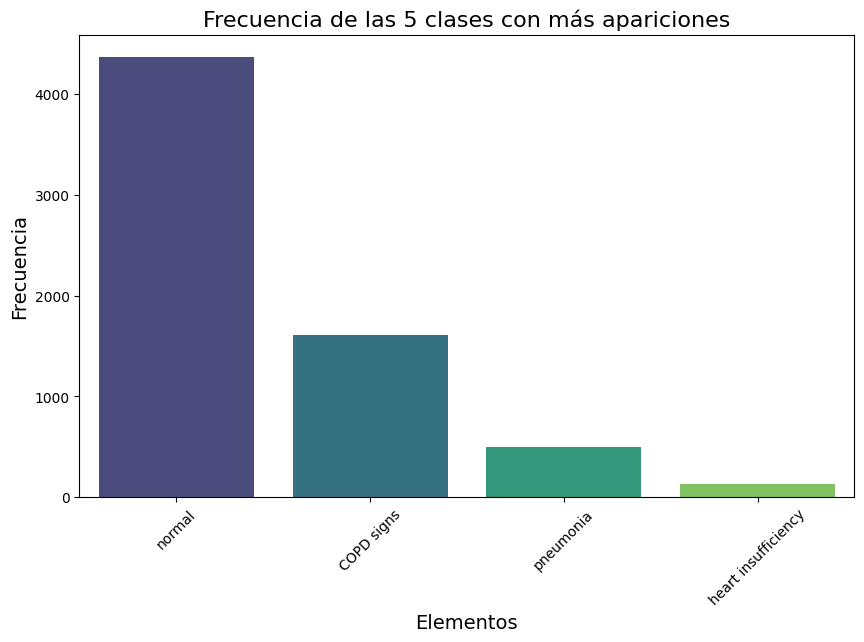

In [108]:
etiquetas = [str(elemento) for elemento, frecuencia in elementos_ordenados_por_frecuencia if frecuencia > 80]
valores = [frecuencia for elemento, frecuencia in elementos_ordenados_por_frecuencia if frecuencia > 80]

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=etiquetas, y=valores, palette="viridis")

# Añadir etiquetas al gráfico
plt.xlabel('Elementos', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.title('Frecuencia de las 5 clases con más apariciones', fontsize=16)

# Ajustar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

### BINARIZAR ETIQUETAS

In [109]:
Y = pd.DataFrame(index=datos_filtrados_finales54.index,
                 columns = ["Col1"])
df_vista =pd.DataFrame(index=datos_filtrados_finales54.index,
                 columns = ["Vista"])

In [110]:
# Assign the values directly
Y['Col1'] = datos_filtrados_finales54.iloc[:, 31]
df_vista['Vista'] = datos_filtrados_finales54.iloc[:, 8]


In [111]:
Y.head()

,Col1
6033,normal
6034,normal
6036,normal
6038,heart insufficiency
6039,normal


In [112]:
df_vista.head()

,Vista
6033,POSTEROANTERIOR
6034,PA
6036,PA
6038,POSTEROANTERIOR
6039,NaN


In [113]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
Y_binarizado = lb.fit_transform(Y["Col1"])

In [114]:
Y_binarizado1 = pd.DataFrame(Y_binarizado, index = Y.index)


In [115]:
clases = lb.classes_

In [116]:
Y_binarizado1.columns = clases

In [117]:
Y_binarizado1

,COPD signs,heart insufficiency,normal,pneumonia
6033,0,0,1,0
6034,0,0,1,0
6036,0,0,1,0
6038,0,1,0,0
6039,0,0,1,0
...,...,...,...,...
38596,0,0,1,0
38601,1,0,0,0
38602,1,0,0,0
38603,0,0,1,0


In [118]:
df_final = pd.DataFrame(datos_filtrados_finales54.iloc[:,[1]])
df_final.head()

,ImageID
6033,246991191036063901714303287513717104600_v31ths...
6034,166890599615093735414579099980326479748_pgilnv...
6036,192196264359104048084124280807262154970_2_4zas...
6038,226422365473064991153945518775386906975_60z035...
6039,155239882101418557561335089160720609518_atmpus...


In [119]:
result = pd.concat([df_final,df_vista, Y_binarizado1], axis=1)
result

,ImageID,Vista,COPD signs,heart insufficiency,normal,pneumonia
6033,246991191036063901714303287513717104600_v31ths...,POSTEROANTERIOR,0,0,1,0
6034,166890599615093735414579099980326479748_pgilnv...,PA,0,0,1,0
6036,192196264359104048084124280807262154970_2_4zas...,PA,0,0,1,0
6038,226422365473064991153945518775386906975_60z035...,POSTEROANTERIOR,0,1,0,0
6039,155239882101418557561335089160720609518_atmpus...,NaN,0,0,1,0
...,...,...,...,...,...,...
38596,159175668036536846545518734169684732544_prbvq7...,NaN,0,0,1,0
38601,198117630279442083542714100636577220720_voyvpv...,LATERAL,1,0,0,0
38602,198117630279442083542714100636577220720_voyvpt...,POSTEROANTERIOR,1,0,0,0
38603,180112077601688061684505599374123465792_yxe3ey...,PA,0,0,1,0


In [51]:
#result["Vista"].value_counts()

In [52]:
#result = result[(result["Vista"] == "POSTEROANTERIOR")| 
 #               (result["Vista"] == "PA")|
 #               (result["Vista"] == "AP")|
 #              (result["Vista"] == "ANTEROPOSTERIOR")]

In [120]:
for i in range(2,6):
    print(result.iloc[:,i].value_counts())

COPD signs
0    4994
1    1604
Name: count, dtype: int64
heart insufficiency
0    6470
1     128
Name: count, dtype: int64
normal
1    4369
0    2229
Name: count, dtype: int64
pneumonia
0    6101
1     497
Name: count, dtype: int64


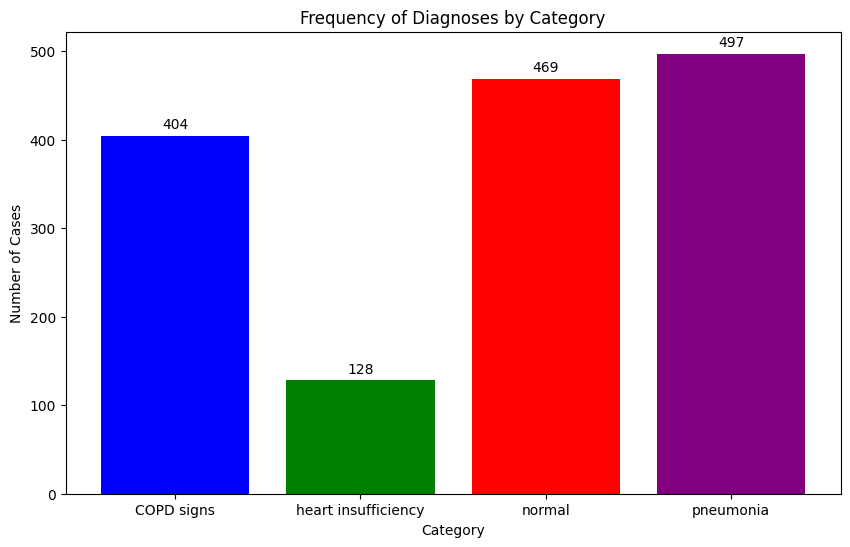

In [13]:
import matplotlib.pyplot as plt

# Nombres de las categorías
categories = ['COPD signs', 'heart insufficiency', 'normal', 'pneumonia']

# Frecuencias para la clase positiva (1) de cada categoría
positive_counts = [404, 128, 469, 497]

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(categories, positive_counts, color=['blue', 'green', 'red', 'purple'])

# Añadir título y etiquetas
ax.set_title('Frequency of Diagnoses by Category')
ax.set_xlabel('Category')
ax.set_ylabel('Number of Cases')

# Añadir la frecuencia en la parte superior de cada barra
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 5, yval, ha='center', va='bottom')

# Mostrar el gráfico
plt.show()



In [122]:
filas_eliminar_normal = result[result["normal"] == 1].sample(n = 3900, random_state = 42)
result = result.drop(filas_eliminar_normal.index)



In [123]:
filas_eliminar_copd = result[result["COPD signs"] == 1].sample(n = 1200, random_state = 42)
result = result.drop(filas_eliminar_copd.index)

In [124]:
len(result)

1498

In [125]:
result

,ImageID,Vista,COPD signs,heart insufficiency,normal,pneumonia
6038,226422365473064991153945518775386906975_60z035...,POSTEROANTERIOR,0,1,0,0
6040,255382349430812131213346302695382137812_i21lnn...,NaN,0,0,1,0
6048,314858274809507033202251388295400218490_h6hx5g...,NaN,0,0,0,1
6054,40604703051024461935381495336984044045_gu7f3e.png,NaN,1,0,0,0
6066,98999006540902083812954778469309304932_9ooxu4.png,NaN,1,0,0,0
...,...,...,...,...,...,...
38592,196315278961068856812224497649522101179_1t2x7m...,NaN,0,0,1,0
38593,239331385013052986216158124580522719268_7xob6d...,PA,0,0,1,0
38594,239331385013052986216158124580522719268_7y9a1d...,LL,0,0,1,0
38601,198117630279442083542714100636577220720_voyvpv...,LATERAL,1,0,0,0


In [7]:
404+128+469+497

1498

In [126]:
for i in range(2,6):
    print(result.iloc[:,i].value_counts())

COPD signs
0    1094
1     404
Name: count, dtype: int64
heart insufficiency
0    1370
1     128
Name: count, dtype: int64
normal
0    1029
1     469
Name: count, dtype: int64
pneumonia
0    1001
1     497
Name: count, dtype: int64


In [127]:
result.to_csv('result.csv', index=True)

In [132]:
destination_folder = './DATA/inputs'

# Asegurarse de que la carpeta de destino existe, si no, crearla
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

In [136]:
# Lista de carpetas donde buscar las imágenes
carpetas = ["./DATA/54/", "./DATA/2/", "./DATA/10/", "DATA/4/"]
# Iterar sobre cada nombre de imagen en el DataFrame
for image_name in result['ImageID']:
    imagen_encontrada = False
    for carpeta in carpetas:
        ruta = os.path.join(carpeta, image_name)
        if os.path.exists(ruta):
            imagen = Image.open(ruta, formats=["PNG"])
            destination_file = os.path.join(destination_folder, os.path.basename(image_name))
            imagen.save(destination_file, format="PNG")
            imagen_encontrada = True
            break
    if not imagen_encontrada:
        print(f"Imagen {image_name} no encontrada en las carpetas especificadas.")